# All protocol consolidation

## Importing other Python Libraries/Modules

In [1]:
import re
import os
import sys
import string
from collections import defaultdict
import glob
import warnings
from datetime import datetime
from datetime import timedelta
import ast
import itertools

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd
import seaborn as sn

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
from eloscore import eloscore

In [5]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

# Summary

- Experiment

- Data

- Purpose of this Jupyter Notebook


In [6]:
all_final_elo_score_file_paths = glob.glob("./pilot*/**/*final_elo_score*.csv", recursive=True)

In [7]:
all_final_elo_score_file_paths

['./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/tube_test_final_elo_score_cages_1_2_3_4_date_2022-04-25_2022-05-20.csv',
 './pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/home_cage_observation_final_elo_score_cages_3_4_date_2022-05-02_2022-05-13.csv',
 './pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/reward_competition_final_elo_score_cages_1_2_3_4_date_20220519_20220520.csv',
 './pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_final_elo_score_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_2/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_5_6_date_2022-07-11_2022-07-29/tube_test_final_elo_score_cages_1_2_3_4_5_6_date_2022-07-11_2022-07-29.csv',
 './pilot_2/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_1_2_3_4_5_

In [8]:
len(all_final_elo_score_file_paths)

12

In [9]:
all_final_elo_score_df = []
for file_path in all_final_elo_score_file_paths:
    per_experiment_df = pd.read_csv(file_path, index_col=0)
    per_experiment_df["subject_id"] = per_experiment_df["subject_id"].astype(float).astype(str)
    print(file_path)
    print(per_experiment_df["subject_id"].unique())
    all_final_elo_score_df.append(per_experiment_df)

./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/tube_test_final_elo_score_cages_1_2_3_4_date_2022-04-25_2022-05-20.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/home_cage_observation_final_elo_score_cages_3_4_date_2022-05-02_2022-05-13.csv
['3.1' '3.2' '3.3' '3.4' '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/reward_competition_final_elo_score_cages_1_2_3_4_date_20220519_20220520.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_final_elo_score_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '

In [10]:
combined_final_elo_score_df = pd.concat(all_final_elo_score_df)
combined_final_elo_score_df = combined_final_elo_score_df.reset_index(drop=True)

In [11]:
combined_final_elo_score_df.head()

,cage,subject_id,final_elo_score,cohort,strain,experiment_type,rank
0,1,1.1,1062.2,pilot_1,C57,tube_test,2.0
1,1,1.2,927.1,pilot_1,C57,tube_test,3.0
2,1,1.3,775.7,pilot_1,C57,tube_test,4.0
3,1,1.4,1235.0,pilot_1,C57,tube_test,1.0
4,2,2.1,1122.6,pilot_1,C57,tube_test,2.0


In [12]:
combined_final_elo_score_df["subject_id"].unique()

array(['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1',
       '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2',
       '5.3', '5.4', '6.1', '6.2', '6.3', '6.4'], dtype=object)

In [13]:
combined_final_elo_score_df.tail()

,cage,subject_id,final_elo_score,cohort,strain,experiment_type,rank
231,5,5.4,1019.7,pilot_3,CD1,urine_marking,1.0
232,6,6.1,980.6,pilot_3,CD1,urine_marking,3.0
233,6,6.2,980.6,pilot_3,CD1,urine_marking,3.0
234,6,6.3,1028.8,pilot_3,CD1,urine_marking,1.0
235,6,6.4,1010.0,pilot_3,CD1,urine_marking,2.0


In [14]:
# experiment_to_elo_score_df = defaultdict(dict)
all_experiment_df = []
for experiment in combined_final_elo_score_df["experiment_type"].unique():
    experiment_df = combined_final_elo_score_df[combined_final_elo_score_df["experiment_type"] == experiment].copy()
    experiment_df = experiment_df.rename(columns={'final_elo_score': "{}_final_elo_score".format(experiment), 'rank': "{}_rank".format(experiment)})
    experiment_df = experiment_df.drop(columns=["experiment_type"])
    experiment_df["subject_id"] = experiment_df["subject_id"].astype(str)
    experiment_df["cage"] = experiment_df["cage"].astype(str)
    all_experiment_df.append(experiment_df)

merged_final_elo_score_df = None
for experiment_df in all_experiment_df:
    if merged_final_elo_score_df is None:
        merged_final_elo_score_df = experiment_df 
    else:
        merged_final_elo_score_df = pd.merge(experiment_df, merged_final_elo_score_df,  how='right', left_on = ["subject_id", "cohort"], right_on = ["subject_id", "cohort"])
#         break
merged_final_elo_score_df = merged_final_elo_score_df.drop_duplicates(subset=["subject_id", "cohort"], keep="last")
merged_final_elo_score_df = merged_final_elo_score_df.reset_index(drop=True)

/tmp/ipykernel_1575/1353013162.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'strain_y', 'cage_y'} in the result is deprecated and will raise a MergeError in a future version.
  merged_final_elo_score_df = pd.merge(experiment_df, merged_final_elo_score_df,  how='right', left_on = ["subject_id", "cohort"], right_on = ["subject_id", "cohort"])


In [15]:
merged_final_elo_score_df.head(n=50)

,cage_x,subject_id,urine_marking_final_elo_score,cohort,strain_x,urine_marking_rank,cage_y,reward_competition_final_elo_score,strain_y,reward_competition_rank,cage_x,home_cage_observation_final_elo_score,strain_x,home_cage_observation_rank,cage_y,tube_test_final_elo_score,strain_y,tube_test_rank
0,1,1.1,1010.3,pilot_1,C57,2.0,1,1165.8,C57,1.0,NaN,NaN,NaN,NaN,1,1062.2,C57,2.0
1,1,1.2,1000.8,pilot_1,C57,3.0,1,1007.3,C57,2.0,NaN,NaN,NaN,NaN,1,927.1,C57,3.0
2,1,1.3,972.0,pilot_1,C57,4.0,1,900.9,C57,4.0,NaN,NaN,NaN,NaN,1,775.7,C57,4.0
3,1,1.4,1016.9,pilot_1,C57,1.0,1,926.0,C57,3.0,NaN,NaN,NaN,NaN,1,1235.0,C57,1.0
4,2,2.1,1037.4,pilot_1,C57,1.0,2,1144.7,C57,1.0,NaN,NaN,NaN,NaN,2,1122.6,C57,2.0
5,2,2.2,972.0,pilot_1,C57,4.0,2,951.4,C57,3.0,NaN,NaN,NaN,NaN,2,947.8,C57,3.0
6,2,2.3,1009.2,pilot_1,C57,2.0,2,921.4,C57,4.0,NaN,NaN,NaN,NaN,2,780.7,C57,4.0
7,2,2.4,981.4,pilot_1,C57,3.0,2,982.5,C57,2.0,NaN,NaN,NaN,NaN,2,1148.9,C57,1.0
8,3,3.1,1010.6,pilot_1,CD1,1.0,3,1132.5,CD1,1.0,3,1185.0,CD1,1.0,3,784.5,CD1,4.0
9,3,3.2,999.4,pilot_1,CD1,3.0,3,963.2,CD1,3.0,3,889.6,CD1,4.0,3,1228.3,CD1,1.0


In [16]:
merged_final_elo_score_df.tail(n=50)

,cage_x,subject_id,urine_marking_final_elo_score,cohort,strain_x,urine_marking_rank,cage_y,reward_competition_final_elo_score,strain_y,reward_competition_rank,cage_x,home_cage_observation_final_elo_score,strain_x,home_cage_observation_rank,cage_y,tube_test_final_elo_score,strain_y,tube_test_rank
14,4,4.3,963.9,pilot_1,CD1,4.0,4,955.1,CD1,3.0,4,924.4,CD1,2.0,4,1108.8,CD1,1.0
15,4,4.4,1046.1,pilot_1,CD1,1.0,4,1033.1,CD1,2.0,4,1288.0,CD1,1.0,4,777.0,CD1,4.0
16,1,1.1,991.9,pilot_2,C57,2.0,1,1193.9,C57,1.0,1,907.5,C57,4.0,1,1149.5,C57,1.0
17,1,1.2,1045.9,pilot_2,C57,1.0,1,1017.3,C57,2.0,1,1191.1,C57,1.0,1,1083.0,C57,2.0
18,1,1.3,972.0,pilot_2,C57,4.0,1,893.9,C57,4.0,1,923.8,C57,3.0,1,998.5,C57,3.0
19,1,1.4,990.2,pilot_2,C57,3.0,1,894.9,C57,3.0,1,977.6,C57,2.0,1,769.0,C57,4.0
20,2,2.1,1010.5,pilot_2,C57,2.0,2,812.1,C57,4.0,2,880.2,C57,4.0,2,997.5,C57,2.0
21,2,2.2,971.7,pilot_2,C57,4.0,2,1000.4,C57,3.0,2,897.1,C57,3.0,2,1035.1,C57,1.0
22,2,2.3,1036.2,pilot_2,C57,1.0,2,1035.9,C57,2.0,2,1317.7,C57,1.0,2,974.8,C57,4.0
23,2,2.4,981.6,pilot_2,C57,3.0,2,1151.6,C57,1.0,2,905.0,C57,2.0,2,992.6,C57,3.0


In [17]:
sorted(merged_final_elo_score_df.columns)

['cage_x',
 'cage_x',
 'cage_y',
 'cage_y',
 'cohort',
 'home_cage_observation_final_elo_score',
 'home_cage_observation_rank',
 'reward_competition_final_elo_score',
 'reward_competition_rank',
 'strain_x',
 'strain_x',
 'strain_y',
 'strain_y',
 'subject_id',
 'tube_test_final_elo_score',
 'tube_test_rank',
 'urine_marking_final_elo_score',
 'urine_marking_rank']

In [18]:
sorted_columns = [ 'cohort',
 'subject_id',
 'home_cage_observation_final_elo_score',
 'home_cage_observation_rank',
 'reward_competition_final_elo_score',
 'reward_competition_rank',
 'tube_test_final_elo_score',
 'tube_test_rank',
 'urine_marking_final_elo_score',
 'urine_marking_rank']

In [19]:
merged_final_elo_score_df = merged_final_elo_score_df[sorted_columns]

In [20]:
merged_final_elo_score_df.to_csv("./proc/combined_final_elo_score_df.csv")

## Combining all the pair wise

In [21]:
all_pairwise_file_paths = glob.glob("./pilot_*/**/*pair*.csv", recursive=True)

In [22]:
all_pairwise_file_paths

['./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/pilot_1_tube_test_grouped_by_pairs_cage_1_2_3_4_date_2022-04-25_2022-05-20.csv',
 './pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/pilot_1_home_cage_observation_grouped_by_pairs_cage_3_4_date_2022-05-02_2022-05-13.csv',
 './pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/pilot_1_reward_competition_grouped_by_pairs_cage_1_2_3_4_date_20220519_20220520.csv',
 './pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/pilot_1_urine_marking_grouped_by_pairs_cage_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_2/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_5_6_date_2022-07-11_2022-07-29/pilot_2_tube_test_grouped_by_pairs_cage_1_2_3_4_5_6_date_2022-07-11_2022-07-29.csv',
 './pilot_2/proc/elo_score_spread_sheets/home_ca

In [23]:
protocols_list = ["urine", "tube", "home_cage", "reward"]

In [24]:
protocol_to_all_df = defaultdict(list)
for protocol in protocols_list:
    for file_path in all_pairwise_file_paths:
        if protocol in file_path:
            protocol_to_all_df[protocol].append(pd.read_csv(file_path, index_col=0))

In [25]:
# protocol_to_concatted_df = defaultdict(dict)
all_protocol_df_list = []
for k, v in protocol_to_all_df.items():
    
#     protocol_to_concatted_df[k] = pd.concat(v)
    all_protocol_df_list.append(pd.concat(v).reset_index(drop=True))

In [26]:
# all_protocol_df_list[0]

all_protocol_df_list[0][all_protocol_df_list[0]["tuple_animal_id"] == "('1.1', '1.2')"]

,tuple_animal_id,first_spot_number,second_spot_number,processed_cage_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,uma_averaged_winner,uma_averaged_loser
0,"('1.1', '1.2')",69.0,10.5,1,pilot_1,C57,58.5,147.169811,False,False,False,1.1,1.2
24,"('1.1', '1.2')",14.0,28.0,1,pilot_2,C57,14.0,66.666667,False,False,False,1.2,1.1
60,"('1.1', '1.2')",1.0,1.0,1,pilot_3,C57,0.0,0.000000,True,True,True,1.2,1.1


In [27]:
all_protocol_df_list[1].head()

,tt_tuple_animal_id,tt_winner,tt_loser,processed_cage_number,cohort,tt_averaged_winner,tt_averaged_loser,tt_winner_count,tt_loser_count,tt_count_difference,tt_match_count,tt_percent_win,tt_percentage_tie
0,"('1.1', '1.2')","['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1....","['1.2', '1.2', '1.2', '1.1', '1.2', '1.2', '1....",1,pilot_1,1.1,1.2,13,1,12,14,0.928571,False
1,"('1.1', '1.3')","['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1....","['1.1', '1.3', '1.3', '1.3', '1.3', '1.3', '1....",1,pilot_1,1.1,1.3,13,1,12,14,0.928571,False
2,"('1.1', '1.4')","['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....","['1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1....",1,pilot_1,1.4,1.1,14,0,14,14,1.000000,False
3,"('1.2', '1.3')","['1.2', '1.3', '1.2', '1.2', '1.2', '1.2', '1....","['1.3', '1.2', '1.3', '1.3', '1.3', '1.3', '1....",1,pilot_1,1.2,1.3,13,1,12,14,0.928571,False
4,"('1.2', '1.4')","['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....","['1.2', '1.2', '1.2', '1.2', '1.2', '1.2', '1....",1,pilot_1,1.4,1.2,14,0,14,14,1.000000,False


In [28]:
merged_all_protocol_pairwise_df = pd.merge(all_protocol_df_list[0], all_protocol_df_list[1],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['tt_tuple_animal_id','cohort'])

In [29]:
merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[2],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['hco_tuple_animal_id','cohort'])

In [30]:
merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[3],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['rc_animal_ids','cohort'])

/tmp/ipykernel_1575/2138773678.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'processed_cage_number_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[3],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['rc_animal_ids','cohort'])


In [31]:
columns_to_drop = [col for col in merged_all_protocol_pairwise_df.columns if "cage" in col]

In [32]:
merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df.drop(columns=columns_to_drop)

In [33]:
merged_all_protocol_pairwise_df.sort_values(['cohort', "tuple_animal_id"]).to_csv("./proc/merged_all_protocol_pairwise_df.csv")

In [34]:
merged_all_protocol_pairwise_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_all_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,1.2,16,13,10,39,3,0.551724,0.410256,True,0.256410
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,1.3,19,16,4,39,3,0.542857,0.487179,True,0.102564
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,1.4,23,15,1,39,8,0.605263,0.589744,False,0.025641
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,1.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,1.4,23,16,0,39,7,0.589744,0.589744,False,0.000000


## Filtering for clear dominance pairs

In [35]:
C57_merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df[merged_all_protocol_pairwise_df["strain"] == "C57"].copy()

In [36]:
CD1_merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df[merged_all_protocol_pairwise_df["strain"] == "CD1"].copy()

In [37]:
C57_merged_all_protocol_pairwise_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_all_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,1.2,16,13,10,39,3,0.551724,0.410256,True,0.256410
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,1.3,19,16,4,39,3,0.542857,0.487179,True,0.102564
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,1.4,23,15,1,39,8,0.605263,0.589744,False,0.025641
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,1.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,1.4,23,16,0,39,7,0.589744,0.589744,False,0.000000


In [38]:
CD1_merged_all_protocol_pairwise_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_all_ratio_tie,rc_tie_to_all_ratio
12,"('3.1', '3.2')",17.0,12.0,pilot_1,CD1,5.0,34.482759,False,False,False,...,3.2,14,6,0,20,8,0.700000,0.700000,False,0.000000
13,"('3.1', '3.3')",24.0,0.0,pilot_1,CD1,24.0,200.000000,False,False,False,...,3.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
14,"('3.1', '3.4')",27.0,23.0,pilot_1,CD1,4.0,16.000000,True,True,True,...,3.4,42,16,1,59,26,0.724138,0.711864,False,0.016949
15,"('3.2', '3.3')",51.0,0.0,pilot_1,CD1,51.0,200.000000,False,False,False,...,3.3,20,15,4,39,5,0.571429,0.512821,False,0.102564
16,"('3.2', '3.4')",10.0,28.0,pilot_1,CD1,18.0,94.736842,False,False,False,...,3.4,25,11,2,38,14,0.694444,0.657895,False,0.052632


In [39]:
merged_all_protocol_pairwise_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

- Cross checking with hand scored results

In [40]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "hco_averaged_winner", "hco_percentage_tie", "hco_percent_win", "hco_action"]].tail(n=50)

,tuple_animal_id,cohort,hco_averaged_winner,hco_percentage_tie,hco_percent_win,hco_action
46,"('4.2', '4.4')",pilot_2,4.2,False,0.975000,"['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ..."
47,"('4.3', '4.4')",pilot_2,NaN,NaN,NaN,NaN
48,"('5.1', '5.2')",pilot_2,5.1,False,1.000000,"['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'c', ..."
49,"('5.1', '5.3')",pilot_2,5.3,False,0.884615,"['f', 'c', 'c', 'f', 'f', 'c', 'f', 'f', 'f', ..."
50,"('5.1', '5.4')",pilot_2,5.4,True,0.651163,"['c', 'f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', ..."
51,"('5.2', '5.3')",pilot_2,5.3,False,1.000000,"['c', 'c', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ..."
52,"('5.2', '5.4')",pilot_2,5.4,False,1.000000,"['f', 'c', 'f', 'f', 'f', 'c', 'f', 'f', 'f', ..."
53,"('5.3', '5.4')",pilot_2,5.3,True,0.692308,"['f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'c', ..."
54,"('6.1', '6.2')",pilot_2,6.1,False,0.912281,"['f', 'c', 'f', 'c', 'f', 'f', 'f', 'f', 'c', ..."
55,"('6.1', '6.3')",pilot_2,6.1,False,0.980000,"['f', 'c', 'f', 'f', 'f', 'f', 'f', 'f', 'c', ..."


In [41]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "tt_averaged_winner", "tt_percentage_tie", "tt_percent_win", "tt_winner"]].head(n=50)

,tuple_animal_id,cohort,tt_averaged_winner,tt_percentage_tie,tt_percent_win,tt_winner
0,"('1.1', '1.2')",pilot_1,1.1,False,0.928571,"['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1...."
1,"('1.1', '1.3')",pilot_1,1.1,False,0.928571,"['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1...."
2,"('1.1', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."
3,"('1.2', '1.3')",pilot_1,1.2,False,0.928571,"['1.2', '1.3', '1.2', '1.2', '1.2', '1.2', '1...."
4,"('1.2', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."
5,"('1.3', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."
6,"('2.1', '2.2')",pilot_1,2.1,False,1.000000,"['2.1', '2.1', '2.1', '2.1', '2.1', '2.1', '2...."
7,"('2.1', '2.3')",pilot_1,2.1,False,1.000000,"['2.1', '2.1', '2.1', '2.1', '2.1', '2.1', '2...."
8,"('2.1', '2.4')",pilot_1,2.4,False,0.750000,"['2.4', '2.4', '2.4', '2.4', '2.4', '2.4', '2...."
9,"('2.2', '2.3')",pilot_1,2.2,False,1.000000,"['2.2', '2.2', '2.2', '2.2', '2.2', '2.2', '2...."


In [42]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "uma_averaged_winner", "uma_number_then_percent_tie", "uma_percent_difference", "uma_number_difference"]].tail(n=50)

,tuple_animal_id,cohort,uma_averaged_winner,uma_number_then_percent_tie,uma_percent_difference,uma_number_difference
46,"('4.2', '4.4')",pilot_2,4.2,False,59.829060,70.0
47,"('4.3', '4.4')",pilot_2,4.3,False,118.750000,19.0
48,"('5.1', '5.2')",pilot_2,5.2,False,180.066445,135.5
49,"('5.1', '5.3')",pilot_2,5.3,True,46.153846,4.5
50,"('5.1', '5.4')",pilot_2,5.4,False,128.985507,178.0
51,"('5.2', '5.3')",pilot_2,5.2,True,30.769231,2.0
52,"('5.2', '5.4')",pilot_2,5.4,False,66.666667,6.5
53,"('5.3', '5.4')",pilot_2,5.3,False,112.408759,38.5
54,"('6.1', '6.2')",pilot_2,6.1,False,90.295359,53.5
55,"('6.1', '6.3')",pilot_2,6.1,False,42.424242,7.0


# Combining all the dataframes

In [43]:
first_merged_final_elo_score_df = merged_final_elo_score_df.copy()
second_merged_final_elo_score_df = merged_final_elo_score_df.copy()

In [44]:
first_merged_final_elo_score_df.columns = ["first_{}".format(col) for col in first_merged_final_elo_score_df.columns]
second_merged_final_elo_score_df.columns = ["second_{}".format(col) for col in second_merged_final_elo_score_df.columns]

In [45]:
first_merged_final_elo_score_df

,first_cohort,first_subject_id,first_home_cage_observation_final_elo_score,first_home_cage_observation_rank,first_reward_competition_final_elo_score,first_reward_competition_rank,first_tube_test_final_elo_score,first_tube_test_rank,first_urine_marking_final_elo_score,first_urine_marking_rank
0,pilot_1,1.1,NaN,NaN,1165.8,1.0,1062.2,2.0,1010.3,2.0
1,pilot_1,1.2,NaN,NaN,1007.3,2.0,927.1,3.0,1000.8,3.0
2,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
3,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
4,pilot_1,2.1,NaN,NaN,1144.7,1.0,1122.6,2.0,1037.4,1.0
...,...,...,...,...,...,...,...,...,...,...
59,pilot_3,5.4,940.6,3.0,954.6,3.0,1165.3,1.0,1019.7,1.0
60,pilot_3,6.1,NaN,NaN,991.0,3.0,1137.7,1.0,980.6,3.0
61,pilot_3,6.2,NaN,NaN,752.6,4.0,1021.2,2.0,980.6,3.0
62,pilot_3,6.3,NaN,NaN,1235.4,1.0,1006.6,3.0,1028.8,1.0


In [46]:
merged_final_elo_score_df

,cohort,subject_id,home_cage_observation_final_elo_score,home_cage_observation_rank,reward_competition_final_elo_score,reward_competition_rank,tube_test_final_elo_score,tube_test_rank,urine_marking_final_elo_score,urine_marking_rank
0,pilot_1,1.1,NaN,NaN,1165.8,1.0,1062.2,2.0,1010.3,2.0
1,pilot_1,1.2,NaN,NaN,1007.3,2.0,927.1,3.0,1000.8,3.0
2,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
3,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
4,pilot_1,2.1,NaN,NaN,1144.7,1.0,1122.6,2.0,1037.4,1.0
...,...,...,...,...,...,...,...,...,...,...
59,pilot_3,5.4,940.6,3.0,954.6,3.0,1165.3,1.0,1019.7,1.0
60,pilot_3,6.1,NaN,NaN,991.0,3.0,1137.7,1.0,980.6,3.0
61,pilot_3,6.2,NaN,NaN,752.6,4.0,1021.2,2.0,980.6,3.0
62,pilot_3,6.3,NaN,NaN,1235.4,1.0,1006.6,3.0,1028.8,1.0


In [47]:
second_merged_final_elo_score_df.groupby(['second_subject_id', "second_cohort"]).count()

second_home_cage_observation_final_elo_score  \
second_subject_id second_cohort                                                 
1.1               pilot_1                                                   0   
                  pilot_2                                                   1   
                  pilot_3                                                   0   
1.2               pilot_1                                                   0   
                  pilot_2                                                   1   
...                                                                       ...   
6.2               pilot_3                                                   0   
6.3               pilot_2                                                   1   
                  pilot_3                                                   0   
6.4               pilot_2                                                   1   
                  pilot_3                                                   0   

                                 second_home_cage_observation_rank  \
second_subject_id second_cohort                                      
1.1               pilot_1                                        0   
                  pilot_2                                        1   
                  pilot_3                                        0   
1.2               pilot_1                                        0   
                  pilot_2                                        1   
...                                                            ...   
6.2               pilot_3                                        0   
6.3               pilot_2                                        1   
                  pilot_3                                        0   
6.4               pilot_2                                        1   
                  pilot_3                                        0   

                                 second_reward_competition_final_elo_score  \
second_subject_id second_cohort                                              
1.1               pilot_1                                                1   
                  pilot_2                                                1   
                  pilot_3                                                1   
1.2               pilot_1                                                1   
                  pilot_2                                                1   
...                                                                    ...   
6.2               pilot_3                                                1   
6.3               pilot_2                                                1   
                  pilot_3                                                1   
6.4               pilot_2                                                1   
                  pilot_3                                                1   

                                 second_reward_competition_rank  \
second_subject_id second_cohort                                   
1.1               pilot_1                                     1   
                  pilot_2                                     1   
                  pilot_3                                     1   
1.2               pilot_1                                     1   
                  pilot_2                                     1   
...                                                         ...   
6.2               pilot_3                                     1   
6.3               pilot_2                                     1   
                  pilot_3                                     1   
6.4               pilot_2                                     1   
                  pilot_3                                     1   

                                 second_tube_test_final_elo_score  \
second_subject_id second_cohort                                     
1.1               pilot_1                  

In [48]:
pd.unique(second_merged_final_elo_score_df[['second_subject_id', 'second_cohort']].values.ravel('K'))

array(['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1',
       '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2',
       '5.3', '5.4', '6.1', '6.2', '6.3', '6.4', 'pilot_1', 'pilot_2',
       'pilot_3'], dtype=object)

In [49]:
second_merged_final_elo_score_df["second_subject_id"]

0     1.1
1     1.2
2     1.3
3     1.4
4     2.1
     ... 
59    5.4
60    6.1
61    6.2
62    6.3
63    6.4
Name: second_subject_id, Length: 64, dtype: object

In [50]:
merged_all_protocol_pairwise_df["first_tuple_animal_id"] = merged_all_protocol_pairwise_df["tuple_animal_id"].apply(lambda x: ast.literal_eval(x)[0])
merged_all_protocol_pairwise_df["second_tuple_animal_id"] = merged_all_protocol_pairwise_df["tuple_animal_id"].apply(lambda x: ast.literal_eval(x)[1])

In [51]:
pairwise_and_final_elo_score_df = pd.merge(merged_all_protocol_pairwise_df, first_merged_final_elo_score_df,  how='left', left_on=['first_tuple_animal_id','cohort'], right_on = ['first_subject_id','first_cohort'])
pairwise_and_final_elo_score_df = pd.merge(pairwise_and_final_elo_score_df, second_merged_final_elo_score_df,  how='left', left_on=['second_tuple_animal_id','cohort'], right_on = ['second_subject_id','second_cohort'])

In [52]:
pairwise_and_final_elo_score_df

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,second_cohort,second_subject_id,second_home_cage_observation_final_elo_score,second_home_cage_observation_rank,second_reward_competition_final_elo_score,second_reward_competition_rank,second_tube_test_final_elo_score,second_tube_test_rank,second_urine_marking_final_elo_score,second_urine_marking_rank
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,pilot_1,1.2,NaN,NaN,1007.3,2.0,927.1,3.0,1000.8,3.0
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"('6.1', '6.3')",2.0,31.0,pilot_3,CD1,29.0,175.757576,False,False,False,...,pilot_3,6.3,NaN,NaN,1235.4,1.0,1006.6,3.0,1028.8,1.0
92,"('6.1', '6.4')",1.0,26.0,pilot_3,CD1,25.0,185.185185,False,False,False,...,pilot_3,6.4,NaN,NaN,1021.0,2.0,834.5,4.0,1010.0,2.0
93,"('6.2', '6.3')",21.0,83.0,pilot_3,CD1,62.0,119.230769,False,False,False,...,pilot_3,6.3,NaN,NaN,1235.4,1.0,1006.6,3.0,1028.8,1.0
94,"('6.2', '6.4')",5.0,10.0,pilot_3,CD1,5.0,66.666667,False,False,False,...,pilot_3,6.4,NaN,NaN,1021.0,2.0,834.5,4.0,1010.0,2.0


In [53]:
pairwise_and_final_elo_score_df.to_csv("./proc/pairwise_and_final_elo_score.csv")

## Making Punnet Squares

In [54]:
pairwise_and_final_elo_score_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,second_cohort,second_subject_id,second_home_cage_observation_final_elo_score,second_home_cage_observation_rank,second_reward_competition_final_elo_score,second_reward_competition_rank,second_tube_test_final_elo_score,second_tube_test_rank,second_urine_marking_final_elo_score,second_urine_marking_rank
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,pilot_1,1.2,NaN,NaN,1007.3,2.0,927.1,3.0,1000.8,3.0
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0


In [55]:
pairwise_and_final_elo_score_df["list_animal_id"] = pairwise_and_final_elo_score_df["tuple_animal_id"].apply(lambda x: list(ast.literal_eval(x)))

In [56]:
pairwise_and_final_elo_score_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

In [57]:
exploded_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df.explode('list_animal_id')

In [58]:
exploded_pairwise_and_final_elo_score_df["uma_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "tie" if x["uma_number_then_percent_tie"] == True else ("dom" if x["list_animal_id"] == str(x["uma_averaged_winner"]) else ("sub" if x["list_animal_id"] == str(x["uma_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["hco_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "tie" if x["hco_percentage_tie"] == True else ("dom" if x["list_animal_id"] == str(x["hco_averaged_winner"]) else ("sub" if x["list_animal_id"] == str(x["hco_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["tt_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "tie" if x["tt_percentage_tie"] == True else ("dom" if x["list_animal_id"] == str(x["tt_averaged_winner"]) else ("sub" if x["list_animal_id"] == str(x["tt_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["rc_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "tie" if x["rc_is_win_to_all_ratio_tie"] == True else ("dom" if x["list_animal_id"] == str(x["rc_averaged_winner"]) else ("sub" if x["list_animal_id"] == str(x["rc_averaged_loser"]) else np.nan)), axis=1)
                                                                                                            
                                                                                                            
#                                                                                                             "dom" if x["list_animal_id"] == x["uma_averaged_winner"])

- Verifying output

In [59]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "uma_dom_tie_sub", "tuple_animal_id", "cohort", "uma_averaged_winner", "uma_number_then_percent_tie", "uma_percent_difference", "uma_number_difference"]].tail()


,list_animal_id,uma_dom_tie_sub,tuple_animal_id,cohort,uma_averaged_winner,uma_number_then_percent_tie,uma_percent_difference,uma_number_difference
93,6.3,dom,"('6.2', '6.3')",pilot_3,6.3,False,119.230769,62.0
94,6.2,sub,"('6.2', '6.4')",pilot_3,6.4,False,66.666667,5.0
94,6.4,dom,"('6.2', '6.4')",pilot_3,6.4,False,66.666667,5.0
95,6.3,dom,"('6.3', '6.4')",pilot_3,6.3,False,88.607595,35.0
95,6.4,sub,"('6.3', '6.4')",pilot_3,6.3,False,88.607595,35.0


In [60]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "hco_dom_tie_sub", "tuple_animal_id", "cohort", "hco_averaged_winner", "hco_percentage_tie", "hco_percent_win", "hco_action"]].tail()

,list_animal_id,hco_dom_tie_sub,tuple_animal_id,cohort,hco_averaged_winner,hco_percentage_tie,hco_percent_win,hco_action
93,6.3,NaN,"('6.2', '6.3')",pilot_3,NaN,NaN,NaN,NaN
94,6.2,NaN,"('6.2', '6.4')",pilot_3,NaN,NaN,NaN,NaN
94,6.4,NaN,"('6.2', '6.4')",pilot_3,NaN,NaN,NaN,NaN
95,6.3,NaN,"('6.3', '6.4')",pilot_3,NaN,NaN,NaN,NaN
95,6.4,NaN,"('6.3', '6.4')",pilot_3,NaN,NaN,NaN,NaN


In [61]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "tt_dom_tie_sub", "tuple_animal_id", "cohort", "tt_averaged_winner", "tt_percentage_tie", "tt_percent_win", "tt_winner"]].head()

,list_animal_id,tt_dom_tie_sub,tuple_animal_id,cohort,tt_averaged_winner,tt_percentage_tie,tt_percent_win,tt_winner
0,1.1,dom,"('1.1', '1.2')",pilot_1,1.1,False,0.928571,"['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1...."
0,1.2,sub,"('1.1', '1.2')",pilot_1,1.1,False,0.928571,"['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1...."
1,1.1,dom,"('1.1', '1.3')",pilot_1,1.1,False,0.928571,"['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1...."
1,1.3,sub,"('1.1', '1.3')",pilot_1,1.1,False,0.928571,"['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1...."
2,1.1,sub,"('1.1', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."


In [62]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "rc_dom_tie_sub", "tuple_animal_id", "cohort", "rc_averaged_winner", "rc_is_win_to_all_ratio_tie", "rc_win_to_all_ratio"]].tail(n=10)

,list_animal_id,rc_dom_tie_sub,tuple_animal_id,cohort,rc_averaged_winner,rc_is_win_to_all_ratio_tie,rc_win_to_all_ratio
91,6.1,sub,"('6.1', '6.3')",pilot_3,6.3,False,0.657895
91,6.3,dom,"('6.1', '6.3')",pilot_3,6.3,False,0.657895
92,6.1,sub,"('6.1', '6.4')",pilot_3,6.4,False,0.605263
92,6.4,dom,"('6.1', '6.4')",pilot_3,6.4,False,0.605263
93,6.2,sub,"('6.2', '6.3')",pilot_3,6.3,False,0.947368
93,6.3,dom,"('6.2', '6.3')",pilot_3,6.3,False,0.947368
94,6.2,sub,"('6.2', '6.4')",pilot_3,6.4,False,0.921053
94,6.4,dom,"('6.2', '6.4')",pilot_3,6.4,False,0.921053
95,6.3,dom,"('6.3', '6.4')",pilot_3,6.3,False,0.763158
95,6.4,sub,"('6.3', '6.4')",pilot_3,6.3,False,0.763158


In [63]:
exploded_pairwise_and_final_elo_score_df["tt_uma_match"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x:np.nan if x["tt_dom_tie_sub"] == "tie" or x["uma_dom_tie_sub"] == "tie" else (True if x["tt_dom_tie_sub"] == x["uma_dom_tie_sub"] else False), axis=1)

In [64]:
exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["cohort"] == "pilot_3"][["tuple_animal_id", "tt_uma_match", "tt_dom_tie_sub", "uma_dom_tie_sub", "cohort"]].head(n=50)

,tuple_animal_id,tt_uma_match,tt_dom_tie_sub,uma_dom_tie_sub,cohort
60,"('1.1', '1.2')",NaN,dom,tie,pilot_3
60,"('1.1', '1.2')",NaN,sub,tie,pilot_3
61,"('1.1', '1.3')",True,dom,dom,pilot_3
61,"('1.1', '1.3')",True,sub,sub,pilot_3
62,"('1.1', '1.4')",NaN,dom,tie,pilot_3
62,"('1.1', '1.4')",NaN,sub,tie,pilot_3
63,"('1.2', '1.3')",True,dom,dom,pilot_3
63,"('1.2', '1.3')",True,sub,sub,pilot_3
64,"('1.2', '1.4')",False,dom,sub,pilot_3
64,"('1.2', '1.4')",False,sub,dom,pilot_3


In [65]:
exploded_pairwise_and_final_elo_score_df.groupby(["strain", "tt_dom_tie_sub", "uma_dom_tie_sub"]).count()

tuple_animal_id  first_spot_number  \
strain tt_dom_tie_sub uma_dom_tie_sub                                       
C57    dom            dom                           16                 16   
                      sub                            9                  9   
                      tie                           10                 10   
       sub            dom                            9                  9   
                      sub                           16                 16   
                      tie                           10                 10   
       tie            dom                            8                  8   
                      sub                            8                  8   
                      tie                           10                 10   
CD1    dom            dom                            9                  9   
                      sub                           20                 20   
                      tie                            8                  8   
       sub            dom                           20                 20   
                      sub                            9                  9   
                      tie                            8                  8   
       tie            dom                            8                  8   
                      sub                            8                  8   
                      tie                            6                  6   

                                       second_spot_number  cohort  \
strain tt_dom_tie_sub uma_dom_tie_sub                               
C57    dom            dom                              16      16   
                      sub                               9       9   
                      tie                              10      10   
       sub            dom                               9       9   
                      sub                              16      16   
                      tie                              10      10   
       tie            dom                               8       8   
                      sub                               8       8   
                      tie                              10      10   
CD1    dom            dom                               9       9   
                      sub                              20      20   
                      tie                               8       8   
       sub            dom                              20      20   
                      sub                               9       9   
                      tie                               8       8   
       tie            dom                               8       8   
                      sub                               8       8   
                      tie                               6       6   

                                       uma_number_difference  \
strain tt_dom_tie_sub uma_dom_tie_sub                          
C57    dom            dom                                 16   
                      sub                                  9   
                      tie                                 10   
       sub            dom                                  9   
                      sub                                 16   
                      tie                                 10   
       tie            dom                                  8   
                      sub                                  8   
                      tie                                 10   
CD1    dom            dom                                  9   
                      sub                                 20   
                      tie                                  8   
       sub            dom                                 20   
                      sub                                  9   
                      tie                                  8   
       tie            dom    

In [66]:
tt_and_uma_confusion = pd.crosstab(exploded_pairwise_and_final_elo_score_df["tt_dom_tie_sub"], exploded_pairwise_and_final_elo_score_df["uma_dom_tie_sub"])
tt_and_uma_confusion = tt_and_uma_confusion.reindex(["dom", "sub", "tie"])
tt_and_uma_confusion

uma_dom_tie_sub,dom,sub,tie
tt_dom_tie_sub,,,
dom,25,29,18
sub,29,25,18
tie,16,16,16


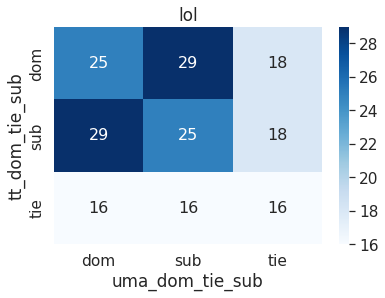

In [67]:
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(tt_and_uma_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
plt.title("lol")
plt.show()

In [68]:
dom_tie_sub_col = [col for col in exploded_pairwise_and_final_elo_score_df if "dom_tie_sub" in col]

In [69]:
dom_tie_sub_col

['uma_dom_tie_sub', 'hco_dom_tie_sub', 'tt_dom_tie_sub', 'rc_dom_tie_sub']

In [70]:
acronym_to_assay = {"tt": "Tube Test", "hco": "Home Cage", "uma": "Urine Marking", "rc": "Reward Competition"}

In [71]:
"abs" < "zyx"

True

hco_dom_tie_sub
uma_dom_tie_sub


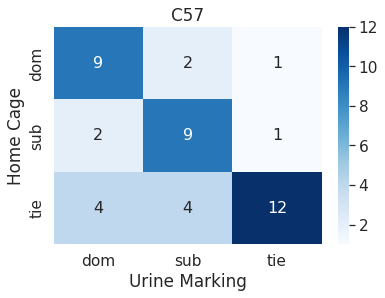

hco_dom_tie_sub
uma_dom_tie_sub


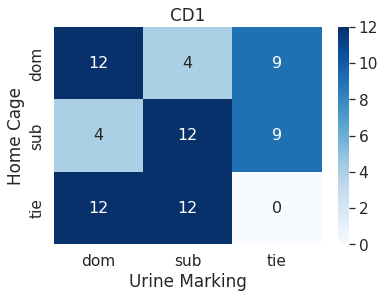

tt_dom_tie_sub
uma_dom_tie_sub


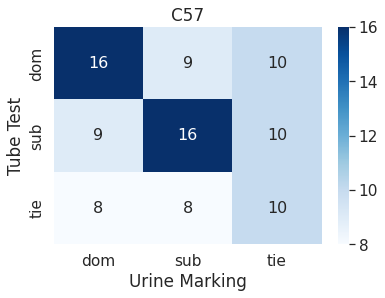

tt_dom_tie_sub
uma_dom_tie_sub


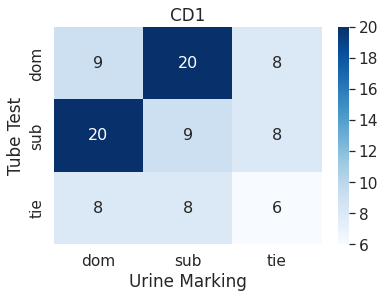

rc_dom_tie_sub
uma_dom_tie_sub


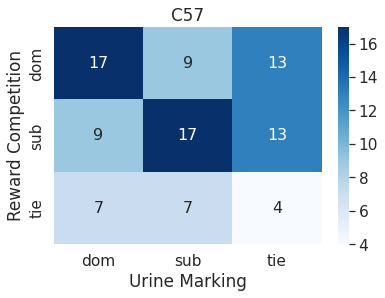

rc_dom_tie_sub
uma_dom_tie_sub


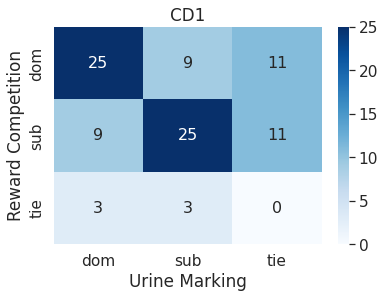

hco_dom_tie_sub
uma_dom_tie_sub


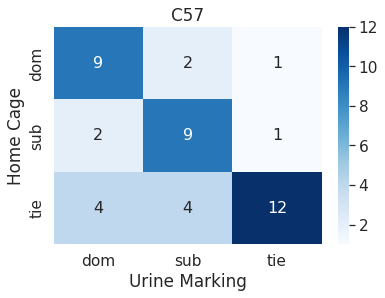

hco_dom_tie_sub
uma_dom_tie_sub


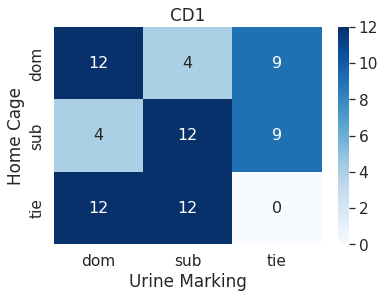

hco_dom_tie_sub
tt_dom_tie_sub


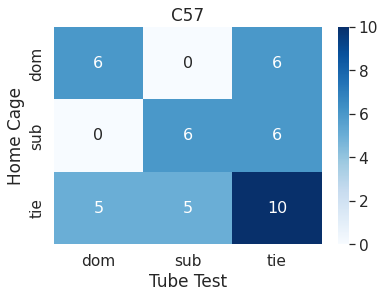

hco_dom_tie_sub
tt_dom_tie_sub


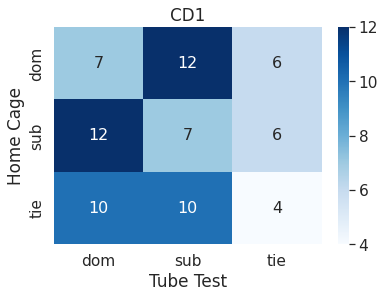

hco_dom_tie_sub
rc_dom_tie_sub


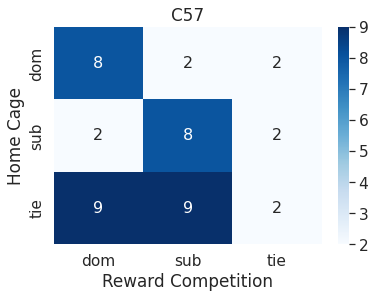

hco_dom_tie_sub
rc_dom_tie_sub


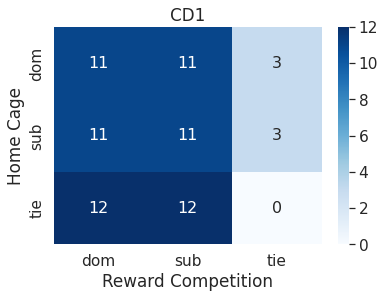

tt_dom_tie_sub
uma_dom_tie_sub


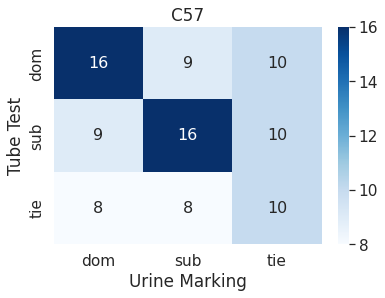

tt_dom_tie_sub
uma_dom_tie_sub


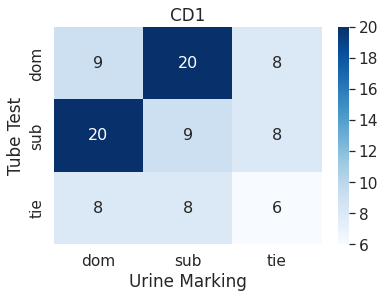

hco_dom_tie_sub
tt_dom_tie_sub


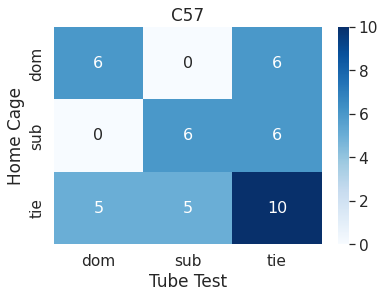

hco_dom_tie_sub
tt_dom_tie_sub


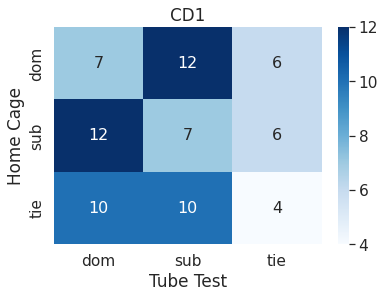

rc_dom_tie_sub
tt_dom_tie_sub


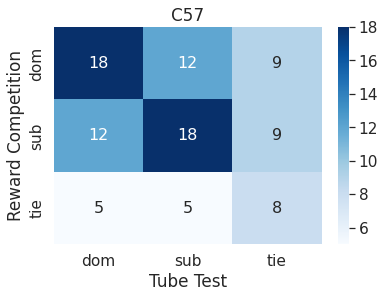

rc_dom_tie_sub
tt_dom_tie_sub


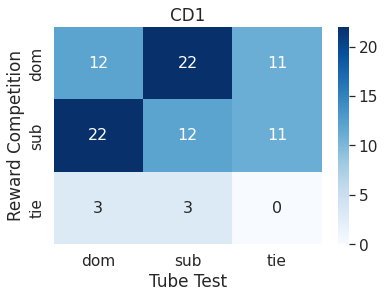

rc_dom_tie_sub
uma_dom_tie_sub


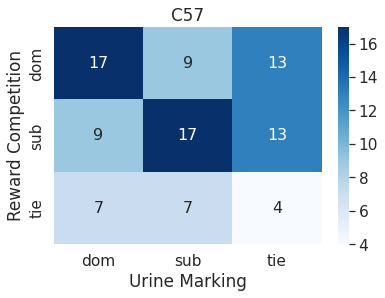

rc_dom_tie_sub
uma_dom_tie_sub


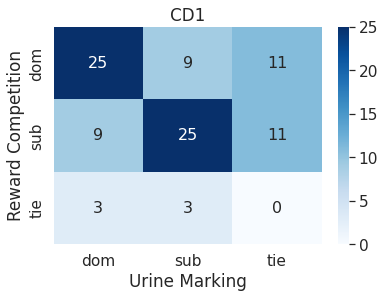

hco_dom_tie_sub
rc_dom_tie_sub


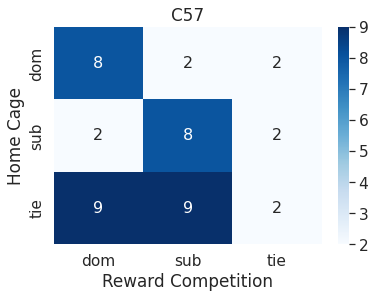

hco_dom_tie_sub
rc_dom_tie_sub


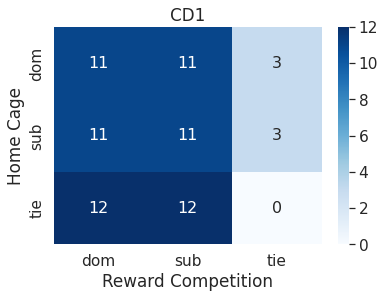

rc_dom_tie_sub
tt_dom_tie_sub


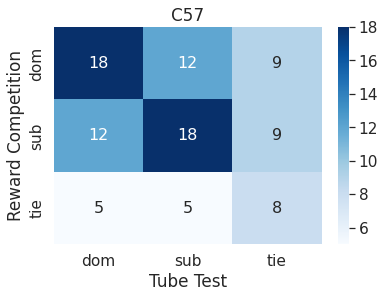

rc_dom_tie_sub
tt_dom_tie_sub


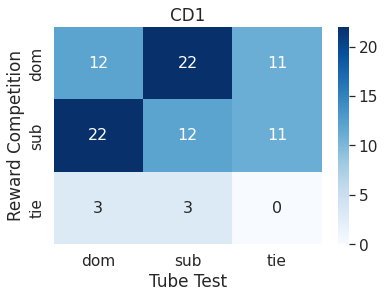

In [72]:
for assay_1, assay_2, strain in itertools.product(dom_tie_sub_col, dom_tie_sub_col, pairwise_and_final_elo_score_df["strain"].unique()):
    if assay_1 == assay_2:
        continue
    if assay_1 > assay_2:
        assay_1, assay_2 = assay_2, assay_1
    print(assay_1)
    print(assay_2)
    strain_df = exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["strain"] == strain]
    pair_assay_confusion = pd.crosstab(strain_df[assay_1], strain_df[assay_2])
    pair_assay_confusion = pair_assay_confusion.reindex(["dom", "sub", "tie"])

    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(pair_assay_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
    plt.title("{}".format(strain))
#     plt.xlabel()
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]

    plt.ylabel(acronym_to_assay[acronym_1])
    plt.xlabel(acronym_to_assay[acronym_2])
    plt.savefig("./proc/pairwise_plots/{}_{}_{}_pairwise_punnet.png".format(strain, acronym_1, acronym_2))
    plt.show()

In [73]:
hco_and_uma_confusion = pd.crosstab(exploded_pairwise_and_final_elo_score_df["hco_dom_tie_sub"], exploded_pairwise_and_final_elo_score_df["uma_dom_tie_sub"])
hco_and_uma_confusion = hco_and_uma_confusion.reindex(["dom", "sub", "tie"])
hco_and_uma_confusion

uma_dom_tie_sub,dom,sub,tie
hco_dom_tie_sub,,,
dom,21,6,10
sub,6,21,10
tie,16,16,12


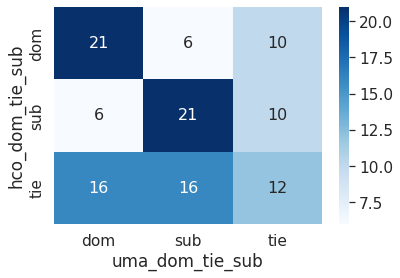

In [74]:
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(hco_and_uma_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size

plt.show()

In [75]:
tt_and_hco_confusion = pd.crosstab(exploded_pairwise_and_final_elo_score_df["tt_dom_tie_sub"], exploded_pairwise_and_final_elo_score_df["hco_dom_tie_sub"])
tt_and_hco_confusion = tt_and_hco_confusion.reindex(["dom", "sub", "tie"])
tt_and_hco_confusion

hco_dom_tie_sub,dom,sub,tie
tt_dom_tie_sub,,,
dom,13,12,15
sub,12,13,15
tie,12,12,14


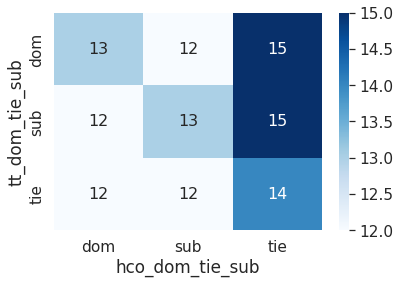

In [76]:
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(tt_and_hco_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size

plt.show()

In [77]:
hco_and_uma_confusion = pd.crosstab(exploded_pairwise_and_final_elo_score_df["hco_dom_tie_sub"], exploded_pairwise_and_final_elo_score_df["uma_dom_tie_sub"])
hco_and_uma_confusion = hco_and_uma_confusion.reindex(["dom", "sub", "tie"])
hco_and_uma_confusion

uma_dom_tie_sub,dom,sub,tie
hco_dom_tie_sub,,,
dom,21,6,10
sub,6,21,10
tie,16,16,12


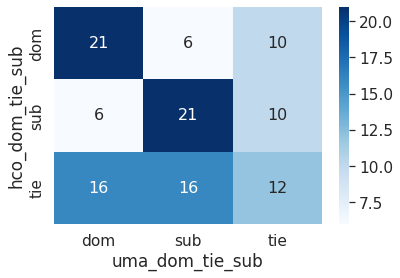

In [78]:
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(hco_and_uma_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size

plt.show()

## Reward Competition Winner vs Loser Disctribution

In [79]:
all_reward_comp_file_paths = glob.glob("./pilot*/**/*reward_competition_all_competition*.csv", recursive=True)

In [80]:
all_reward_comp_file_paths

['./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/pilot_1_reward_competition_all_competition_cage_1_2_3_4_date_20220519_20220520.csv',
 './pilot_2/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_5_6_date_20220728_20220729/pilot_2_reward_competition_all_competition_cage_1_2_3_4_5_6_date_20220728_20220729.csv',
 './pilot_3/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_5_6_date_20221003_20221004/pilot_3_reward_competition_all_competition_cage_1_2_3_4_5_6_date_20221003_20221004.csv']

In [81]:
all_reward_comp_df = []
for file_path in all_reward_comp_file_paths:
    per_experiment_df = pd.read_csv(file_path, index_col=0)
    all_reward_comp_df.append(per_experiment_df)

In [82]:
combined_reward_comp_df = pd.concat(all_reward_comp_df)
combined_reward_comp_df = combined_reward_comp_df.reset_index(drop=True)

In [83]:
combined_reward_comp_df["rc_averaged_loser"] = combined_reward_comp_df["rc_averaged_loser"].astype(str)
combined_reward_comp_df["rc_averaged_winner"] = combined_reward_comp_df["rc_averaged_winner"].astype(str)

In [84]:
combined_reward_comp_df.head()

,rc_animal_ids,rc_date,rc_winner,rc_loser,rc_winner_no_ties,rc_loser_no_ties,rc_different_result_as_previous,rc_number_of_switches,cohort,processed_cage_number,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_all_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",2022-05-19,"['1.1', '1.1', '1.1', '1.1', '1.2', '1.2', '1....","['1.2', '1.2', '1.2', '1.2', '1.1', '1.1', '1....","['1.1', '1.1', '1.1', '1.1', '1.2', '1.2', '1....","['1.2', '1.2', '1.2', '1.2', '1.1', '1.1', '1....","[False, False, False, True, False, True, True,...",8,pilot_1,1,...,1.2,11,9,0,20,2,0.550000,0.550000,False,0.000000
1,"('1.1', '1.2')",2022-05-20,"['1.1', 'tie', '1.2', 'tie', '1.2', 'tie', '1....","['1.2', 'tie', '1.1', 'tie', '1.1', 'tie', '1....","['1.1', '1.2', '1.2', '1.1', '1.1', '1.1', '1....","['1.2', '1.1', '1.1', '1.2', '1.2', '1.2', '1....","[True, False, True, False, False, True, False,...",4,pilot_1,1,...,1.2,5,4,10,19,1,0.555556,0.263158,True,0.526316
2,"('1.1', '1.3')",2022-05-19,"['1.3', 'tie', '1.3', '1.1', '1.1', '1.3', '1....","['1.1', 'tie', '1.1', '1.3', '1.3', '1.1', '1....","['1.3', '1.3', '1.1', '1.1', '1.3', '1.3', '1....","['1.1', '1.1', '1.3', '1.3', '1.1', '1.1', '1....","[False, True, False, True, False, False, True,...",6,pilot_1,1,...,1.1,13,4,2,19,9,0.764706,0.684211,False,0.105263
3,"('1.1', '1.3')",2022-05-20,"['1.1', 'tie', '1.3', '1.1', '1.1', '1.1', '1....","['1.3', 'tie', '1.1', '1.3', '1.3', '1.3', '1....","['1.1', '1.3', '1.1', '1.1', '1.1', '1.1', '1....","['1.3', '1.1', '1.3', '1.3', '1.3', '1.3', '1....","[True, True, False, False, False, False, False...",4,pilot_1,1,...,1.3,15,3,2,20,12,0.833333,0.750000,False,0.100000
4,"('1.1', '1.4')",2022-05-19,"['1.4', '1.1', '1.4', '1.4', '1.1', '1.4', '1....","['1.1', '1.4', '1.1', '1.1', '1.4', '1.1', '1....","['1.4', '1.1', '1.4', '1.4', '1.1', '1.4', '1....","['1.1', '1.4', '1.1', '1.1', '1.4', '1.1', '1....","[True, True, False, True, True, True, True, Fa...",9,pilot_1,1,...,1.1,13,7,0,20,6,0.650000,0.650000,False,0.000000


In [85]:
winner_merged_final_elo_score_df = merged_final_elo_score_df.copy()
loser_merged_final_elo_score_df = merged_final_elo_score_df.copy()

In [86]:
winner_merged_final_elo_score_df.columns = ["winner_{}".format(col) for col in winner_merged_final_elo_score_df.columns]
loser_merged_final_elo_score_df.columns = ["loser_{}".format(col) for col in loser_merged_final_elo_score_df.columns]

In [87]:
winner_merged_final_elo_score_df.head()

,winner_cohort,winner_subject_id,winner_home_cage_observation_final_elo_score,winner_home_cage_observation_rank,winner_reward_competition_final_elo_score,winner_reward_competition_rank,winner_tube_test_final_elo_score,winner_tube_test_rank,winner_urine_marking_final_elo_score,winner_urine_marking_rank
0,pilot_1,1.1,NaN,NaN,1165.8,1.0,1062.2,2.0,1010.3,2.0
1,pilot_1,1.2,NaN,NaN,1007.3,2.0,927.1,3.0,1000.8,3.0
2,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
3,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
4,pilot_1,2.1,NaN,NaN,1144.7,1.0,1122.6,2.0,1037.4,1.0


In [88]:
winner_merged_final_elo_score_df.groupby(['winner_subject_id', "winner_cohort"]).count()

winner_home_cage_observation_final_elo_score  \
winner_subject_id winner_cohort                                                 
1.1               pilot_1                                                   0   
                  pilot_2                                                   1   
                  pilot_3                                                   0   
1.2               pilot_1                                                   0   
                  pilot_2                                                   1   
...                                                                       ...   
6.2               pilot_3                                                   0   
6.3               pilot_2                                                   1   
                  pilot_3                                                   0   
6.4               pilot_2                                                   1   
                  pilot_3                                                   0   

                                 winner_home_cage_observation_rank  \
winner_subject_id winner_cohort                                      
1.1               pilot_1                                        0   
                  pilot_2                                        1   
                  pilot_3                                        0   
1.2               pilot_1                                        0   
                  pilot_2                                        1   
...                                                            ...   
6.2               pilot_3                                        0   
6.3               pilot_2                                        1   
                  pilot_3                                        0   
6.4               pilot_2                                        1   
                  pilot_3                                        0   

                                 winner_reward_competition_final_elo_score  \
winner_subject_id winner_cohort                                              
1.1               pilot_1                                                1   
                  pilot_2                                                1   
                  pilot_3                                                1   
1.2               pilot_1                                                1   
                  pilot_2                                                1   
...                                                                    ...   
6.2               pilot_3                                                1   
6.3               pilot_2                                                1   
                  pilot_3                                                1   
6.4               pilot_2                                                1   
                  pilot_3                                                1   

                                 winner_reward_competition_rank  \
winner_subject_id winner_cohort                                   
1.1               pilot_1                                     1   
                  pilot_2                                     1   
                  pilot_3                                     1   
1.2               pilot_1                                     1   
                  pilot_2                                     1   
...                                                         ...   
6.2               pilot_3                                     1   
6.3               pilot_2                                     1   
                  pilot_3                                     1   
6.4               pilot_2                                     1   
                  pilot_3                                     1   

                                 winner_tube_test_final_elo_score  \
winner_subject_id winner_cohort                                     
1.1               pilot_1                  

In [89]:
rc_all_competition_with_other_ranks_df = pd.merge(combined_reward_comp_df, winner_merged_final_elo_score_df,  how='left', left_on=['rc_averaged_winner','cohort'], right_on = ['winner_subject_id','winner_cohort'])
rc_all_competition_with_other_ranks_df = pd.merge(rc_all_competition_with_other_ranks_df, loser_merged_final_elo_score_df,  how='left', left_on=['rc_averaged_loser','cohort'], right_on = ['loser_subject_id','loser_cohort'])

In [90]:
rc_all_competition_with_other_ranks_df.tail()

,rc_animal_ids,rc_date,rc_winner,rc_loser,rc_winner_no_ties,rc_loser_no_ties,rc_different_result_as_previous,rc_number_of_switches,cohort,processed_cage_number,...,loser_cohort,loser_subject_id,loser_home_cage_observation_final_elo_score,loser_home_cage_observation_rank,loser_reward_competition_final_elo_score,loser_reward_competition_rank,loser_tube_test_final_elo_score,loser_tube_test_rank,loser_urine_marking_final_elo_score,loser_urine_marking_rank
186,"('6.2', '6.3')",2022-10-04,"['6.3', '6.2', '6.3', '6.3', '6.3', '6.3', '6....","['6.2', '6.3', '6.2', '6.2', '6.2', '6.2', '6....","['6.3', '6.2', '6.3', '6.3', '6.3', '6.3', '6....","['6.2', '6.3', '6.2', '6.2', '6.2', '6.2', '6....","[True, True, False, False, False, False, False...",2,pilot_3,6,...,pilot_3,6.2,NaN,NaN,752.6,4.0,1021.2,2.0,980.6,3.0
187,"('6.2', '6.4')",2022-10-03,"['6.4', '6.4', '6.2', '6.2', '6.4', '6.4', '6....","['6.2', '6.2', '6.4', '6.4', '6.2', '6.2', '6....","['6.4', '6.4', '6.2', '6.2', '6.4', '6.4', '6....","['6.2', '6.2', '6.4', '6.4', '6.2', '6.2', '6....","[False, True, False, True, False, False, False...",2,pilot_3,6,...,pilot_3,6.2,NaN,NaN,752.6,4.0,1021.2,2.0,980.6,3.0
188,"('6.2', '6.4')",2022-10-04,"['6.4', '6.4', '6.2', '6.4', '6.4', '6.4', '6....","['6.2', '6.2', '6.4', '6.2', '6.2', '6.2', '6....","['6.4', '6.4', '6.2', '6.4', '6.4', '6.4', '6....","['6.2', '6.2', '6.4', '6.2', '6.2', '6.2', '6....","[False, True, True, False, False, False, False...",2,pilot_3,6,...,pilot_3,6.2,NaN,NaN,752.6,4.0,1021.2,2.0,980.6,3.0
189,"('6.3', '6.4')",2022-10-03,"['6.3', '6.4', '6.4', '6.4', '6.3', '6.4', '6....","['6.4', '6.3', '6.3', '6.3', '6.4', '6.3', '6....","['6.3', '6.4', '6.4', '6.4', '6.3', '6.4', '6....","['6.4', '6.3', '6.3', '6.3', '6.4', '6.3', '6....","[True, False, False, True, True, True, True, T...",10,pilot_3,6,...,pilot_3,6.4,NaN,NaN,1021.0,2.0,834.5,4.0,1010.0,2.0
190,"('6.3', '6.4')",2022-10-04,"['6.3', '6.3', '6.3', '6.3', '6.3', '6.3', '6....","['6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6....","['6.3', '6.3', '6.3', '6.3', '6.3', '6.3', '6....","['6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6....","[False, False, False, False, False, True, True...",4,pilot_3,6,...,pilot_3,6.4,NaN,NaN,1021.0,2.0,834.5,4.0,1010.0,2.0


In [91]:
hco_rank_1_4_for_reward_comf_df = rc_all_competition_with_other_ranks_df[(rc_all_competition_with_other_ranks_df["winner_home_cage_observation_rank"].isin([1, 4])) & (rc_all_competition_with_other_ranks_df["loser_home_cage_observation_rank"].isin([1, 4]))]

In [92]:
tt_rank_1_4_for_reward_comf_df = rc_all_competition_with_other_ranks_df[(rc_all_competition_with_other_ranks_df["winner_tube_test_rank"].isin([1, 4])) & (rc_all_competition_with_other_ranks_df["loser_tube_test_rank"].isin([1, 4]))]

In [93]:
hco_rank_1_4_for_reward_comf_df[["winner_home_cage_observation_rank", "loser_home_cage_observation_rank"]]

,winner_home_cage_observation_rank,loser_home_cage_observation_rank
24,1.0,4.0
43,1.0,4.0
44,1.0,4.0
47,4.0,1.0
48,4.0,1.0
61,1.0,4.0
62,1.0,4.0
71,1.0,4.0
72,1.0,4.0
89,1.0,4.0


In [94]:
cd1_rank_to_rc_wins = {}

In [95]:
cd1_rank_to_rc_wins["tt_rank_1_wins"] = []
cd1_rank_to_rc_wins["tt_rank_4_wins"] = []
for index, row in tt_rank_1_4_for_reward_comf_df[tt_rank_1_4_for_reward_comf_df["strain"] == "CD1"].iterrows():
    if row["winner_tube_test_rank"] == 1:
        cd1_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_loser_count"])

    else:
        cd1_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_loser_count"])


In [96]:
cd1_rank_to_rc_wins["hco_rank_1_wins"] = []
cd1_rank_to_rc_wins["hco_rank_4_wins"] = []
for index, row in hco_rank_1_4_for_reward_comf_df[hco_rank_1_4_for_reward_comf_df["strain"] == "CD1"].iterrows():
    if row["winner_home_cage_observation_rank"] == 1:
        cd1_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_loser_count"])

    else:
        cd1_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_loser_count"])


In [97]:
c57_rank_to_rc_wins = {}

In [98]:
c57_rank_to_rc_wins["tt_rank_1_wins"] = []
c57_rank_to_rc_wins["tt_rank_4_wins"] = []
for index, row in tt_rank_1_4_for_reward_comf_df[tt_rank_1_4_for_reward_comf_df["strain"] == "C57"].iterrows():
    if row["winner_tube_test_rank"] == 1:
        c57_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_loser_count"])

    else:
        c57_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_loser_count"])


In [99]:
c57_rank_to_rc_wins["hco_rank_1_wins"] = []
c57_rank_to_rc_wins["hco_rank_4_wins"] = []
for index, row in hco_rank_1_4_for_reward_comf_df[hco_rank_1_4_for_reward_comf_df["strain"] == "C57"].iterrows():
    if row["winner_home_cage_observation_rank"] == 1:
        c57_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_loser_count"])

    else:
        c57_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_loser_count"])


In [100]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (12,5)

[Text(1, 0, 'tt_rank_1_wins'),
 Text(2, 0, 'tt_rank_4_wins'),
 Text(3, 0, 'hco_rank_1_wins'),
 Text(4, 0, 'hco_rank_4_wins')]

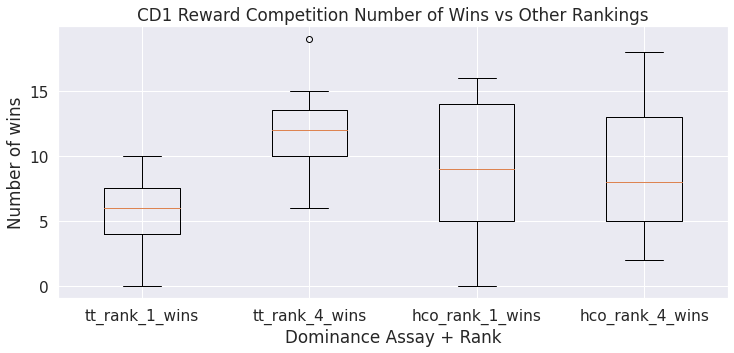

In [101]:
fig, ax = plt.subplots()
plt.title("CD1 Reward Competition Number of Wins vs Other Rankings")
plt.xlabel("Dominance Assay + Rank")
plt.ylabel("Number of wins")
ax.boxplot(cd1_rank_to_rc_wins.values())
ax.set_xticklabels(cd1_rank_to_rc_wins.keys())

[Text(1, 0, 'tt_rank_1_wins'),
 Text(2, 0, 'tt_rank_4_wins'),
 Text(3, 0, 'hco_rank_1_wins'),
 Text(4, 0, 'hco_rank_4_wins')]

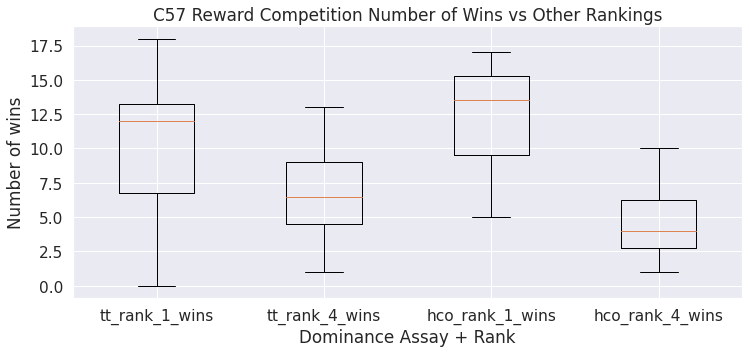

In [102]:
fig, ax = plt.subplots()
plt.title("C57 Reward Competition Number of Wins vs Other Rankings")
plt.xlabel("Dominance Assay + Rank")
plt.ylabel("Number of wins")
ax.boxplot(c57_rank_to_rc_wins.values())
ax.set_xticklabels(c57_rank_to_rc_wins.keys())

In [103]:
cd1_rank_to_rc_wins

{'tt_rank_1_wins': [6, 10, 7, 5, 9, 6, 4, 8, 4, 6, 0, 2, 6, 9, 4],
 'tt_rank_4_wins': [14, 9, 12, 12, 6, 13, 7, 11, 11, 11, 19, 15, 12, 9, 14],
 'hco_rank_1_wins': [14, 15, 15, 10, 6, 4, 6, 9, 16, 5, 14, 1, 0],
 'hco_rank_4_wins': [6, 4, 3, 5, 12, 8, 13, 8, 2, 14, 5, 18, 18]}

In [104]:
c57_rank_to_rc_wins

{'tt_rank_1_wins': [9, 11, 7, 13, 18, 16, 0, 5, 13, 14, 5, 6, 10, 15, 13, 13],
 'tt_rank_4_wins': [11, 8, 13, 6, 1, 3, 8, 13, 3, 5, 9, 9, 7, 3, 5, 6],
 'hco_rank_1_wins': [8, 5, 16, 17, 13, 14, 10, 15],
 'hco_rank_4_wins': [10, 6, 2, 1, 3, 5, 7, 3]}

In [105]:
pd.concat({k: pd.Series(v) for k, v in cd1_rank_to_rc_wins.items()}, axis=1).to_csv("./proc/cd1_rank_to_rc_wins")

In [106]:
pd.concat({k: pd.Series(v) for k, v in c57_rank_to_rc_wins.items()}, axis=1).to_csv("./proc/c57_rank_to_rc_wins")

In [107]:
raise ValueError("")

ValueError: 

In [ ]:
'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
       'rc_all_match_count_including_ties',
       'rc_winner_count_minus_loser_count', 'rc_win_to_win_plus_lost_ratio',
       'rc_win_to_all_ratio', 'rc_is_win_to_all_ratio_tie',
       'rc_tie_to_all_ratio', 

In [ ]:
pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["rc_is_win_to_all_ratio_tie"]][["rc_win_to_win_plus_lost_ratio", "rc_win_to_all_ratio"]]

In [ ]:
bins=

In [ ]:
plt.rcParams["figure.figsize"] = (12,7)


In [ ]:
c57_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["strain"] == "C57"]

In [ ]:
cd1_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["strain"] == "CD1"]

In [ ]:
plt.hist(pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"], alpha=0.5, label='wins to win + loss')
plt.hist(pairwise_and_final_elo_score_df["rc_win_to_all_ratio"], alpha=0.5, label='wins to all')
plt.axvline(pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"].abs().mean(), color='k', linestyle='-', linewidth=1, label="wins to win + loss average")
plt.axvline(pairwise_and_final_elo_score_df["rc_win_to_all_ratio"].abs().mean(), color='k', linestyle='--', linewidth=1, label="wins to all average")
plt.title("CD1 and C57 Reward Competition Win Percentages")
plt.xlabel("Ratio")
plt.ylabel("Number per ratio")
plt.legend(loc='upper left')
# plt.savefig("./proc/c57_pee_spots.png")
plt.show()

In [ ]:
plt.hist(c57_pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"], alpha=0.5, label='wins to win + loss')
plt.hist(c57_pairwise_and_final_elo_score_df["rc_win_to_all_ratio"], alpha=0.5, label='wins to all')
plt.axvline(c57_pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"].abs().mean(), color='k', linestyle='-', linewidth=1, label="wins to win + loss average")
plt.axvline(c57_pairwise_and_final_elo_score_df["rc_win_to_all_ratio"].abs().mean(), color='k', linestyle='--', linewidth=1, label="wins to all average")
plt.title("C57 Reward Competition Win Percentages")
plt.xlabel("Ratio")
plt.ylabel("Number per ratio")
plt.legend(loc='upper left')
# plt.savefig("./proc/c57_pee_spots.png")
plt.show()

In [ ]:
plt.hist(cd1_pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"], alpha=0.5, label='wins to win + loss')
plt.hist(cd1_pairwise_and_final_elo_score_df["rc_win_to_all_ratio"], alpha=0.5, label='wins to all')
plt.axvline(cd1_pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"].abs().mean(), color='k', linestyle='-', linewidth=1, label="wins to win + loss average")
plt.axvline(cd1_pairwise_and_final_elo_score_df["rc_win_to_all_ratio"].abs().mean(), color='k', linestyle='--', linewidth=1, label="wins to all average")
plt.title("CD1 Reward Competition Win Percentages")
plt.xlabel("Ratio")
plt.ylabel("Number per ratio")
plt.legend(loc='upper left')
# plt.savefig("./proc/c57_pee_spots.png")
plt.show()

## Percent Stable and percent unstable

In [ ]:
pairwise_and_final_elo_score_df.columns

In [ ]:
c57_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["strain"] == "C57"]

In [ ]:
cd1_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["strain"] == "CD1"]

In [ ]:
tie_columns = [col for col in pairwise_and_final_elo_score_df.columns if "tie" in col]

In [ ]:
tie_columns

In [ ]:
tie_columns = ['uma_number_then_percent_tie',
 'tt_percentage_tie',
 'hco_percentage_tie',
 'rc_is_win_to_all_ratio_tie']

In [ ]:
assay_to_strain_to_tie = defaultdict(dict)
for assay, strain in itertools.product(tie_columns, pairwise_and_final_elo_score_df["strain"].unique()):
    print(assay)
    print(strain)
    strain_df = pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["strain"] == strain].dropna(subset=assay).copy()
    strain_df[assay] = strain_df[assay].astype(bool)
    assay_to_strain_to_tie[assay][strain] = len(strain_df[~strain_df[assay]]) / len(strain_df)

In [ ]:
assay_to_strain_to_tie

In [ ]:
raise ValueError("")

## Urine Marking Assay

In [ ]:
urine_marking_file_paths = glob.glob("./**/*urine_marking_elo_score_history*.csv", recursive=True)

In [ ]:
urine_marking_file_paths

In [ ]:
all_urine_marking_df = []
for file_path in urine_marking_file_paths:
    all_urine_marking_df.append(pd.read_csv(file_path, index_col=0))

In [ ]:
combined_urine_marking_df = pd.concat(all_urine_marking_df)
combined_urine_marking_df = combined_urine_marking_df.reset_index(drop=True)

In [ ]:
combined_urine_marking_df = combined_urine_marking_df.reset_index()

- For even rows, the left pee spots correspond to the subject's pee spots

In [ ]:
even_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 == 0].copy()

In [ ]:
even_urine_marking_df.columns

In [ ]:
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_id": "left_subject_id"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_ranking": "left_ranking"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"updated_elo_score": "left_elo_score"})
even_urine_marking_df = even_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "right_number_of_spots", "original_elo_score"])
even_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(even_urine_marking_df)))

In [ ]:
odd_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 != 0].copy()

In [ ]:
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_id": "right_subject_id"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_ranking": "right_ranking"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"updated_elo_score": "right_elo_score"})
odd_urine_marking_df = odd_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "left_number_of_spots", "original_elo_score"])
odd_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(odd_urine_marking_df)))

In [ ]:
even_urine_marking_df.head()

In [ ]:
odd_urine_marking_df.head()

In [ ]:
cols_to_use = list(odd_urine_marking_df.columns.difference(even_urine_marking_df.columns))
cols_to_use.append("matching_index")

In [ ]:
cols_to_use

In [ ]:
urine_marking_left_right = pd.merge(even_urine_marking_df, odd_urine_marking_df[cols_to_use], left_on=["matching_index"], right_on=["matching_index"], how='outer')

In [ ]:
urine_marking_left_right

In [ ]:
sorted(urine_marking_left_right.columns)

In [ ]:
sorted_columns = ['experiment_type',
 'cohort',
 'cage',
 'processed_cage_number',
 'strain',
 'date',
 'match',
 'winner',
 'loser',
 'ties',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'left_subject_id',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'total_match_number',
 'win_draw_loss',
 ]

In [ ]:
urine_marking_left_right = urine_marking_left_right[sorted_columns]

In [ ]:
urine_marking_left_right.head()

In [ ]:
urine_marking_left_right["left_subject_id"] = urine_marking_left_right["left_subject_id"].astype(str)
urine_marking_left_right["right_subject_id"] = urine_marking_left_right["right_subject_id"].astype(str)

In [ ]:
merged_final_elo_score_df["subject_id"] = merged_final_elo_score_df["subject_id"].astype(str)

In [ ]:
left_merged_final_elo_score_df = merged_final_elo_score_df

In [ ]:
left_subject_column_renaming = {}
for col in left_merged_final_elo_score_df.columns:
    left_subject_column_renaming[col] = "left_" + col

In [ ]:
left_merged_final_elo_score_df = left_merged_final_elo_score_df.rename(columns=left_subject_column_renaming)

In [ ]:
right_merged_final_elo_score_df = merged_final_elo_score_df

In [ ]:
right_subject_column_renaming = {}
for col in right_merged_final_elo_score_df.columns:
    right_subject_column_renaming[col] = "right_" + col

In [ ]:
right_merged_final_elo_score_df = right_merged_final_elo_score_df.rename(columns=right_subject_column_renaming)

In [ ]:
cols_to_use = list(urine_marking_left_right.columns.difference(left_merged_final_elo_score_df.columns))
# cols_to_use.append("cohort")
cols_to_use.append("left_subject_id")

In [ ]:
cols_to_use


In [ ]:
urine_and_elo_score_df = pd.merge(urine_marking_left_right[cols_to_use], left_merged_final_elo_score_df, left_on=["left_subject_id", "cohort"], right_on=["left_subject_id", "left_cohort"], how='inner')

In [ ]:
cols_to_use = list(urine_and_elo_score_df.columns.difference(right_merged_final_elo_score_df.columns))
cols_to_use.append("right_subject_id")

In [ ]:
urine_and_elo_score_df = pd.merge(urine_and_elo_score_df[cols_to_use], right_merged_final_elo_score_df, left_on=["right_subject_id", "cohort"], right_on=["right_subject_id", "right_cohort"], how='inner')

In [ ]:
urine_and_elo_score_df["pee_spot_difference"] = urine_and_elo_score_df["left_number_of_spots"] - urine_and_elo_score_df["right_number_of_spots"]
urine_and_elo_score_df["tube_test_elo_score_difference"] = urine_and_elo_score_df["left_tube_test_final_elo_score"] - urine_and_elo_score_df["right_tube_test_final_elo_score"]
urine_and_elo_score_df["home_cage_observation_elo_score_difference"] = urine_and_elo_score_df["left_home_cage_observation_final_elo_score"] - urine_and_elo_score_df["right_home_cage_observation_final_elo_score"]
urine_and_elo_score_df["reward_competition_elo_score_difference"] = urine_and_elo_score_df["left_reward_competition_final_elo_score"] - urine_and_elo_score_df["right_reward_competition_final_elo_score"]

urine_and_elo_score_df["tube_test_rank_difference"] = urine_and_elo_score_df["left_tube_test_rank"] - urine_and_elo_score_df["right_tube_test_rank"]
urine_and_elo_score_df["home_cage_observation_rank_difference"] = urine_and_elo_score_df["left_home_cage_observation_rank"] - urine_and_elo_score_df["right_home_cage_observation_rank"]
urine_and_elo_score_df["reward_competition_rank_difference"] = urine_and_elo_score_df["left_reward_competition_rank"] - urine_and_elo_score_df["right_reward_competition_rank"]


In [ ]:
sorted(urine_and_elo_score_df.columns)

In [ ]:
sorted_columns = ['cohort',
 'cage',
 'processed_cage_number',
 'strain',

 'date',
 'winner',
 'loser',
 'ties',

 'left_subject_id',
 'left_elo_score',
 'left_ranking',
 'right_subject_id',
 'right_elo_score',
 'right_ranking',
 'left_number_of_spots',
 'right_number_of_spots',
 'pee_spot_difference', 
 'tube_test_elo_score_difference',
 'home_cage_observation_elo_score_difference',
 'reward_competition_elo_score_difference',
 'tube_test_rank_difference',
 'home_cage_observation_rank_difference',
 'reward_competition_rank_difference',  
                  
 'left_home_cage_observation_final_elo_score',
 'left_home_cage_observation_rank',
 'left_reward_competition_final_elo_score',
 'left_reward_competition_rank',
 'left_tube_test_final_elo_score',
 'left_tube_test_rank',
 'left_urine_marking_final_elo_score',
 'left_urine_marking_rank',

 'right_home_cage_observation_final_elo_score',
 'right_home_cage_observation_rank',
 'right_reward_competition_final_elo_score',
 'right_reward_competition_rank',
 'right_tube_test_final_elo_score',
 'right_tube_test_rank',
 'right_urine_marking_final_elo_score',
 'right_urine_marking_rank',

 'session_number',
 'session_number_difference',
 'total_match_number']

In [ ]:
urine_and_elo_score_df = urine_and_elo_score_df[sorted_columns]

In [ ]:
urine_and_elo_score_df

In [ ]:
urine_and_elo_score_df.to_csv("./proc/urine_marking_with_all_elo_score.csv")

In [ ]:
urine_and_elo_score_df.dropna(axis=1)

In [ ]:
urine_and_elo_score_df.columns.difference(urine_and_elo_score_df.dropna(axis=1).columns)

# Plotting

In [ ]:
urine_and_elo_score_df["winner_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] >= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)
urine_and_elo_score_df["loser_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] <= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)

In [ ]:
urine_and_elo_score_df.columns

In [ ]:
urine_and_elo_score_df["adjusted_winner_number_of_spots"] = urine_and_elo_score_df["winner_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_loser_number_of_spots"] = urine_and_elo_score_df["loser_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_pee_spot_difference"] = urine_and_elo_score_df["pee_spot_difference"].abs().apply(lambda x: 100 if x >= 100 else x)

In [ ]:
c57_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "C57"]

In [ ]:
plt.hist(c57_df["winner_number_of_spots"], bins=30)

In [ ]:
plt.hist(c57_df["loser_number_of_spots"], bins=30)

In [ ]:
bins = 30

In [ ]:
plt.hist(c57_df["adjusted_winner_number_of_spots"], bins, alpha=0.5, label='Winner')
plt.hist(c57_df["adjusted_loser_number_of_spots"], bins, alpha=0.5, label='Loser')
plt.axvline(c57_df["adjusted_winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="Winner Average")
plt.axvline(c57_df["adjusted_loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="Loser Average")
plt.title("C57 Number of Pee Spots vs Sessions")
plt.xlabel("Number of pee spots")
plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/c57_pee_spots.png")
plt.show()

In [ ]:
cd1_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "CD1"]

In [ ]:
bins = 30

In [ ]:
plt.hist(cd1_df["adjusted_winner_number_of_spots"], bins, alpha=0.5, label='Winner')
plt.hist(cd1_df["adjusted_loser_number_of_spots"], bins, alpha=0.5, label='Loser')
plt.axvline(cd1_df["adjusted_winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="Winner Average")
plt.axvline(cd1_df["adjusted_loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="Loser Average")
plt.title("CD1 Number of Pee Spots vs Sessions")
plt.xlabel("Number of pee spots")
plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/cd1_pee_spots.png")
plt.show()

In [ ]:
plt.hist(c57_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='C57')
plt.hist(cd1_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1')

# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')
plt.title("CD1 and C57 Number of Pee Spots Differences")
plt.xlabel("Difference in pee spots")
plt.axvline(c57_df["pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="C57 Average")
plt.axvline(cd1_df["pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="CD1 Average")

plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/pee_spot_difference.png")

plt.show()

In [ ]:
plt.hist(c57_df["adjusted_pee_spot_difference"].abs(), bins, alpha=0.5, label='C57')
plt.hist(cd1_df["adjusted_pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1')

# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')
plt.title("Adjusted CD1 and C57 Number of Pee Spots Differences")
plt.xlabel("Difference in pee spots")
plt.axvline(c57_df["adjusted_pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="C57 Average")
plt.axvline(cd1_df["adjusted_pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="CD1 Average")

plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/adjusted_pee_spot_difference.png")

plt.show()